In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
personal_expenses= pd.read_excel(r"personal expenses.xlsx")

In [6]:
personal_expenses.shape

(134, 15)

In [7]:
personal_expenses.describe()

,debit_amount,Original_transaction_amount,Billing_date,comments,Labeling,Discount_club,Discount_key,Conversion rate from source/accounting currency to ils
count,133.000000,133.000000,134,0.0,0.0,0.0,0.0,0.0
mean,174.122105,178.247444,2024-05-04 01:36:42.985074688,NaN,NaN,NaN,NaN,NaN
min,5.500000,5.500000,2024-02-02 00:00:00,NaN,NaN,NaN,NaN,NaN
25%,33.000000,33.000000,2024-04-02 00:00:00,NaN,NaN,NaN,NaN,NaN
50%,60.000000,62.000000,2024-05-02 00:00:00,NaN,NaN,NaN,NaN,NaN
75%,176.500000,184.280000,2024-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN
max,3273.000000,3273.000000,2024-08-02 00:00:00,NaN,NaN,NaN,NaN,NaN
std,380.054928,381.773375,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Checking the data for NaNs
personal_expenses.isna().sum()

transaction_date                                            0
Name_of_the_business                                        0
category                                                    0
transaction_type                                            0
debit_amount                                                1
Debit_currency                                              0
Original_transaction_amount                                 1
Original_transaction_currency                               0
Billing_date                                                0
comments                                                  134
Labeling                                                  134
Discount_club                                             134
Discount_key                                              134
The_way_the_transaction_is_carried_out                      0
Conversion rate from source/accounting currency to ils    134
dtype: int64

In [9]:
#Removing empty columns that are not informative
personal_expenses = personal_expenses.drop(columns=['Conversion rate from source/accounting currency to ils',
    'comments',
    'Labeling',
    'Discount_club',
    'Discount_key'])

In [10]:
#Checking for duplicates and uniqueness of fields
personal_expenses["Debit_currency"].unique

<bound method Series.unique of 0      ₪
1      ₪
2      ₪
3      ₪
4      ₪
      ..
129    ₪
130    ₪
131    ₪
132    ₪
133    ₪
Name: Debit_currency, Length: 134, dtype: object>

In [11]:
personal_expenses["Original_transaction_currency"].unique

<bound method Series.unique of 0      ₪
1      ₪
2      ₪
3      ₪
4      ₪
      ..
129    ₪
130    ₪
131    ₪
132    ₪
133    ₪
Name: Original_transaction_currency, Length: 134, dtype: object>

In [12]:
personal_expenses.transaction_type.unique()

array(['Normal', 'Payments'], dtype=object)

In [13]:
#Removing unnecessary duplicate information
personal_expenses.drop(columns='Original_transaction_currency', inplace=True)

In [14]:
#Checking if there is missing data in one of this simaler columns
personal_expenses[personal_expenses["debit_amount"]!=personal_expenses["Original_transaction_amount"]]

,transaction_date,Name_of_the_business,category,transaction_type,debit_amount,Debit_currency,Original_transaction_amount,Billing_date,The_way_the_transaction_is_carried_out
25,2024-02-26 00:00:00,Moovit,Transportation and vehicles,Normal,59.33,₪,NaN,2024-03-03,Contactless transaction
82,2024-05-26 00:00:00,BEST SOURCE SNKRS,Fashion,Normal,NaN,₪,608.0,2024-06-02,Contactless transaction


In [15]:
#Fixing missing debit_amount vlaue with Original_transaction_amount
personal_expenses.loc[82, 'debit_amount'] = personal_expenses.loc[82, 'Original_transaction_amount']

In [16]:
#Removing unnecessary duplicate information
personal_expenses.drop(columns='Original_transaction_amount', inplace=True)

In [17]:
#Checking for uniqueness of the The_way_the_transaction_is_carried_out field
personal_expenses.The_way_the_transaction_is_carried_out.unique()

array(['Contactless transaction', 'Bit', 'Payment in mobile', 'Phone',
       'In the presence of a card', 'Internet'], dtype=object)

In [18]:
#Checking type of fields
personal_expenses.dtypes

transaction_date                                  object
Name_of_the_business                              object
category                                          object
transaction_type                                  object
debit_amount                                     float64
Debit_currency                                    object
Billing_date                              datetime64[ns]
The_way_the_transaction_is_carried_out            object
dtype: object

In [19]:
# Parsing transaction_date to be datetime64
personal_expenses.transaction_date = pd.to_datetime(personal_expenses.transaction_date, format='mixed')
# sorting personal_expenses by transaction_date
personal_expenses=personal_expenses.sort_values(by="transaction_date")
#resting the index numbers
personal_expenses.reset_index(drop=True, inplace=True)


In [20]:
#Checking for uniqueness of Name_of_the_business field
personal_expenses['Name_of_the_business'].unique()

array(['coffee time', 'Dizengoff coffee', 'Transfer in BIT BIP',
       'Sira bar', 'AZAF', 'Baruch bar', 'Menta Gas Station',
       'Transfer in BIT', 'Moovit', 'Gatsby bar', 'Inn Ein Kerem',
       'salute', 'Morden Bar Ltd.', 'halilit', 'Burgersbar Penny Eilat',
       'Ivory', 'fuel station paz', 'Hataklit bar', 'Goa',
       'Touch the wind', 'The Sheikh meeting', 'Maine Noodles Ltd.',
       'taxs', 'All in Harel Store Ltd.', 'haver card charge', 'Rosts',
       'paz station YELLOW ', 'mega tickets', 'basta bar', 'karma',
       'fuel station sonol', 'Naia Restaurant', 'Safra parking lot',
       'mala bistro', "McDonald's National Park",
       'Piano Piano Port Tel Aviv', 'MA automated machines',
       'Climbing Wall Block Ltd.', 'KCANS&EGEVB SYEVRAH', 'In Serbia',
       'Jerusalem Fukach', 'Aroma cliffs', 'Matan Elder',
       "Arava's delicacies", 'Mua Winery', 'alonit', 'Pango',
       'Health Care Ltd.', 'Super-Pharm', 'KFC', 'Vanalia Jerusalem',
       'Inclave Ltd.', '

In [22]:
#Fixing the seprate Name_of_the_business fields which are basicly the same
personal_expenses['Name_of_the_business'].replace("Transfer in BIT BIP", "Transfer in BIT", inplace=True)

In [23]:
#Checking for uniqueness of the category field
personal_expenses['category'].unique()

array(['Restaurants, coffee and bars', 'Bit', 'Fuel, electricity and gas',
       'Transportation and vehicles', 'Leisure, entertainment and sports',
       'variance', 'Electricity and computers', 'Books and pattern',
       'Food and consumption', 'Municipality and government',
       'Home Design', 'Medicine and pharmacies', 'Fashion',
       'Flights and tourism'], dtype=object)

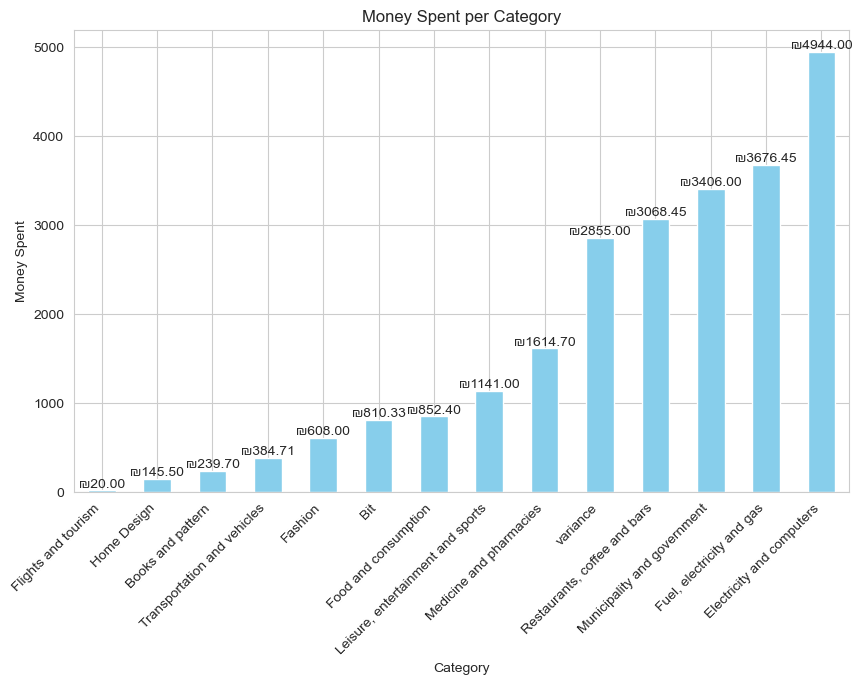

In [24]:
#Ploting the money spent per category in a bar chart

debit_amount_by_category = personal_expenses.debit_amount.groupby(personal_expenses.category).sum().sort_values()
sns.set_style("whitegrid")

# Plot the bar graph
plt.figure(figsize=(10, 6))
ax = debit_amount_by_category.plot(kind='bar', color='skyblue')

# Adding title, labels, and xticks settings
plt.title('Money Spent per Category')
plt.xlabel('Category')
plt.ylabel('Money Spent')
plt.xticks(rotation=45, ha='right')

# Adding value annotations
for p in ax.patches:
    # Get the height of the bar
    height = p.get_height()
    # Add the text annotation
    ax.text(p.get_x() + p.get_width() / 2, height, f'₪{height:.2f}', 
            ha='center', va='bottom')

# Show the plot
plt.show()


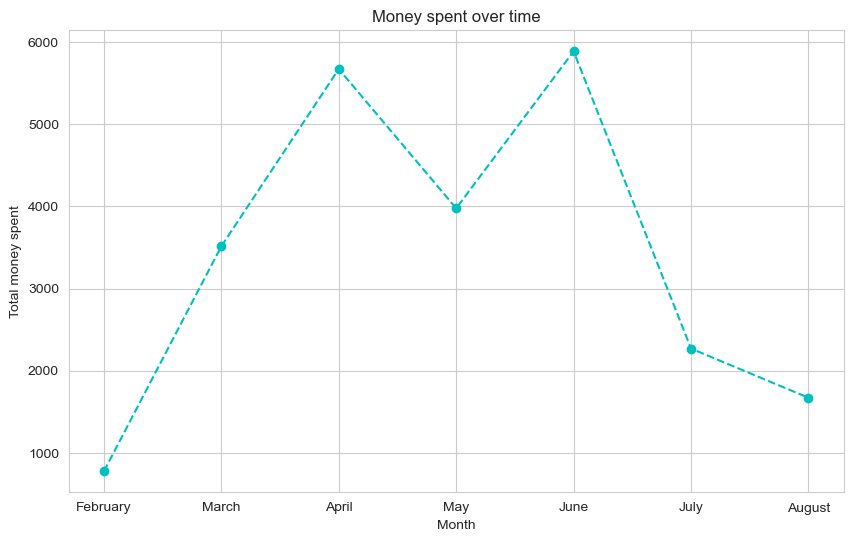

In [25]:
#Ploting the money spent over the months in a line chart

debit_amount_by_month =personal_expenses.debit_amount.groupby(personal_expenses.Billing_date.dt.month).sum()

plt.figure(figsize=(10, 6))
plt.title("Money spent over time")
plt.xticks(ticks=personal_expenses.Billing_date.dt.month.unique(), labels=personal_expenses.Billing_date.dt.month_name().unique())
plt.xlabel('Month')
plt.ylabel('Total money spent')
plt.plot(debit_amount_by_month, 'o--c')

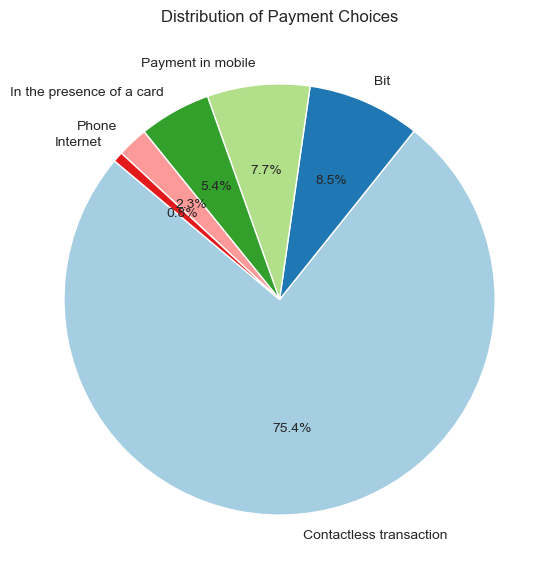

In [68]:
#Ploting the distribution of payment choices in a pie chart


# Group by 'The_way_the_transaction_is_carried_out' and count the occurrences
payment_choice_distribution = personal_expenses['The_way_the_transaction_is_carried_out'].value_counts()

# Plot
plt.figure(figsize=(10, 7))
plt.pie(payment_choice_distribution, 
        labels=payment_choice_distribution.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired(range(len(payment_choice_distribution))))
plt.title('Distribution of Payment Choices')
plt.show()


In [67]:
from scipy import stats
#While outliers were not a problem on monthly analysis, they become more noticeable in weekday spending calculations. 
#This can skew the results, as i want to get a clearer picture of typical weekday spending without the outliers.

# Calculate Z-scores for debit amounts
personal_expenses['z_score'] = stats.zscore(personal_expenses['debit_amount'])

# Define a threshold for what you consider an outlier, e.g., 3 standard deviations from the mean
outliers = personal_expenses[personal_expenses['z_score'].abs() > 3]

# Display the outliers
print(outliers[['transaction_date', 'Name_of_the_business', 'debit_amount', 'z_score']])


   transaction_date Name_of_the_business  debit_amount   z_score
17       2024-02-08              halilit         953.0  5.164438
32       2024-03-06    haver card charge         788.0  4.139973
34       2024-03-08              halilit         953.0  5.164438
94       2024-05-26    BEST SOURCE SNKRS         608.0  3.022375


In [65]:
#removing this outliers 
weekly_spending = personal_expenses
weekly_spending.drop([19,38,63,96],inplace=True)

In [66]:
#Money spending over weekdays.

# Map weekday numbers to day names
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Group by transaction_date's weekday and sum the debit_amount
weekly_spending = weekly_spending.debit_amount.groupby(weekly_spending.transaction_date.dt.weekday).sum()

# Map the day numbers to day names
weekly_spending.index = weekly_spending.index.map(day_names)

# Reorder to start from Sunday to Saturday
weekly_spending = weekly_spending.reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

print(weekly_spending)


transaction_date
Sunday       2680.31
Monday       1032.77
Tuesday      2094.35
Wednesday    2992.24
Thursday     2112.35
Friday       2652.24
Saturday     2193.98
Name: debit_amount, dtype: float64


In [106]:
#number of visits per Name_of_the_business
top_shops = personal_expenses['Name_of_the_business'].value_counts().head(10)
top_shops

Name_of_the_business
Transfer in BIT       11
Menta Gas Station     10
Moovit                 7
fuel station paz       6
coffee time            5
Baruch bar             5
mala bistro            4
fuel station sonol     4
Pango                  4
Safra parking lot      3
Name: count, dtype: int64